In [19]:
import cPickle as pickle
import gzip
import matplotlib.pylab as pl
%matplotlib inline
import mxnet as mx
import numpy as np
from data_utilities import load_mnist
from attended_memory_network import attended_memory_network

In [4]:
training_X, training_Y, validation_X, validation_Y, test_X, test_Y = pickle.load(gzip.open('rescaled_mnist.gz', 'rb'))

In [21]:
parameters, states = pickle.load(open('parameters/rescaled-mnist-attentioned-memory-network-3'))

In [73]:
settings = (
{
  'operator' : 'convolution',
  'kwargs' : {'n_filters' : 8, 'kernel_shape' : (3, 3), 'stride' : (1, 1), 'pad' : (1, 1)},
},
{
  'operator' : 'pooling',
  'kwargs' : {'mode' : 'maximum', 'kernel_shape' : (2, 2), 'stride' : (2, 2), 'pad' : (0, 0)},
},
{
  'operator' : 'attended_memory_module',
  'settings' : {
    'convolution_settings' : {'n_filters' : 8, 'kernel_shape' : (3, 3), 'stride' : (1, 1), 'pad' : (1, 1)},
    'n_layers' : 10,
    'probability' : 'softmax',
    'weight_sharing' : True,
  },
}
)
network = attended_memory_network(settings)
internals = network.get_internals()

In [20]:
symbols = []
try:
    for internal in internals:
        if 'softmaxactivation' in str(internal): symbols.append(internal)
except: pass

In [33]:
N_SAMPLES = 100
output_list = []
for symbol in symbols:
    symbol_args = symbol.list_arguments()
    arg_values = {key : value for key, value in parameters.items() if key in symbol_args}
    arg_values['data'] = test_X[:N_SAMPLES]
    symbol_states = symbol.list_auxiliary_states()
    state_values = {key : value for key, value in states.items() if key in symbol_states}
    for key, value in arg_values.items(): arg_values[key] = mx.nd.array(value)
    for key, value in state_values.items(): state_values[key] = mx.nd.array(value)
    executor = symbol.bind(mx.cpu(), args=arg_values, aux_states=state_values)
    output_list.append(executor.forward()[0].asnumpy())

In [57]:
def extend_map(array, ratio):
    N, D = array.shape
    canvas = np.zeros((N, D * ratio))
    for index in range(D):
        canvas[:, index * ratio : (index + 1) * ratio] = array[:,index].reshape((N, 1))
    return canvas

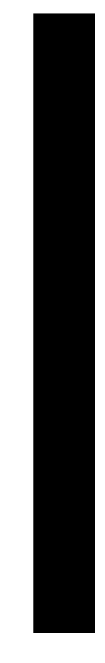

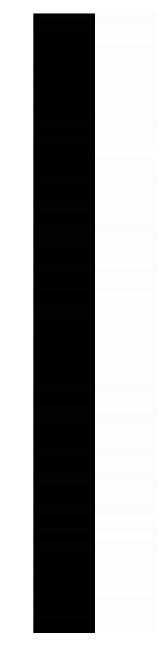

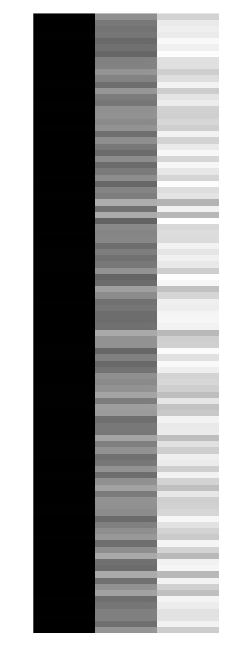

In [64]:
# TODO there is issue in the 1st attention map
for outputs in output_list:
    pl.figure(figsize=(8, 8))
    pl.imshow(extend_map(outputs, 10), cmap='gray', interpolation='none')
    pl.axis('off')

In [65]:
# TODO: attention should be focused on the last slot if character is large

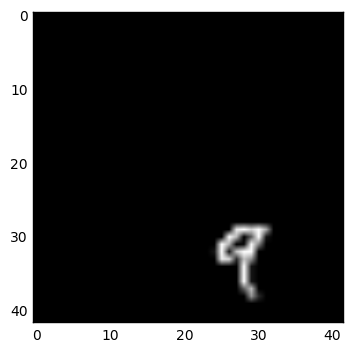

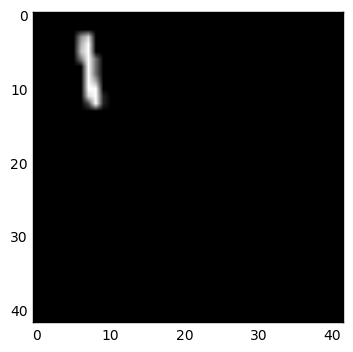

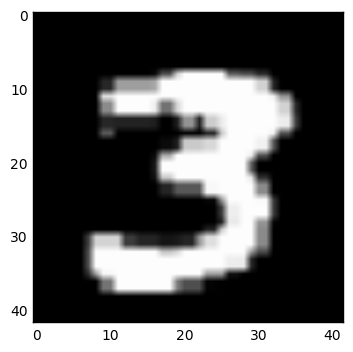

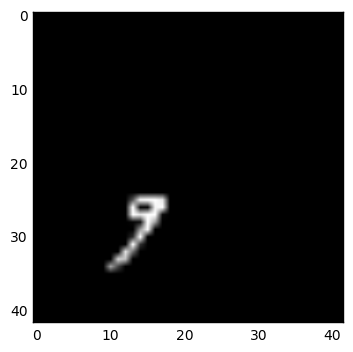

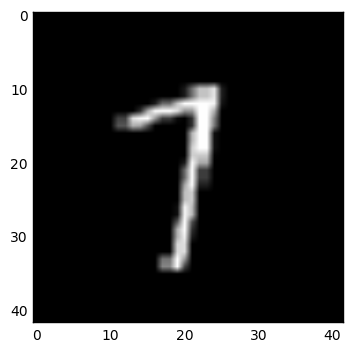

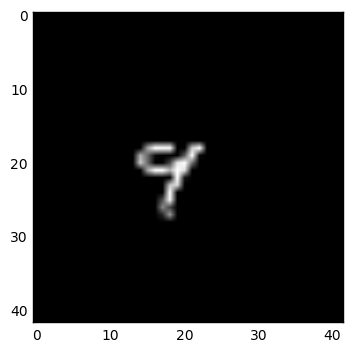

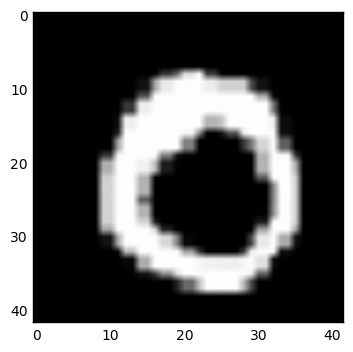

In [70]:
attentions = output_list[2]
for index, attention in enumerate(attentions):
    if 0.2 < attention[1] and attention[1] < 0.3:
        pl.figure()
        pl.imshow(training_X[index].reshape((42, 42)), cmap='gray')

/home/alex/python_official/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


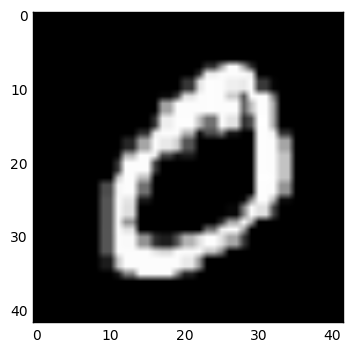

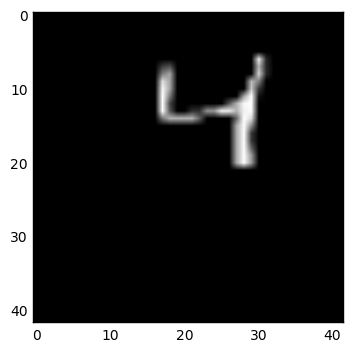

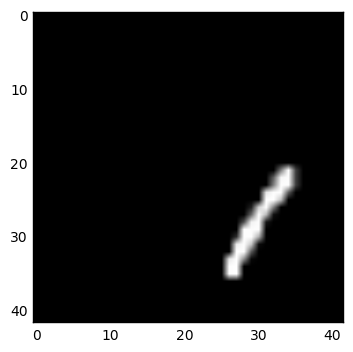

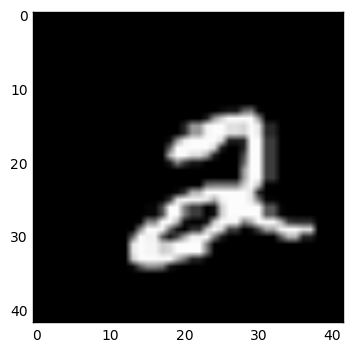

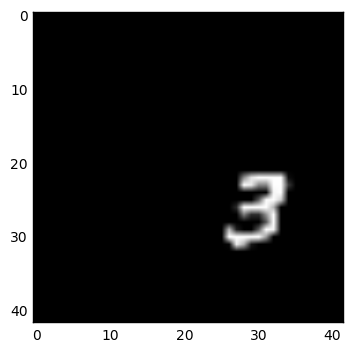

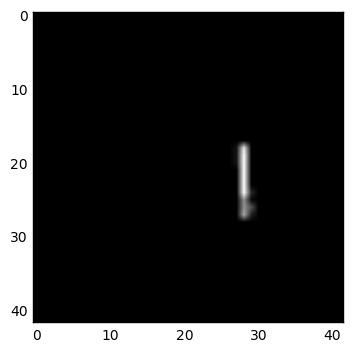

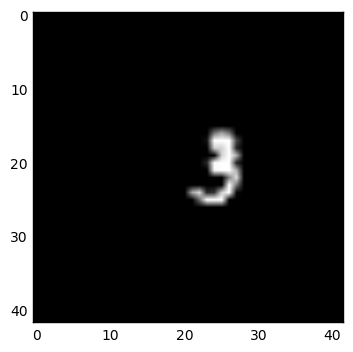

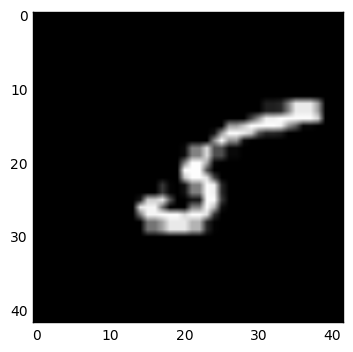

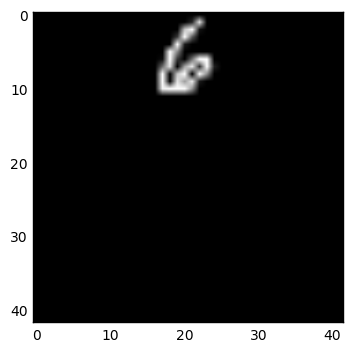

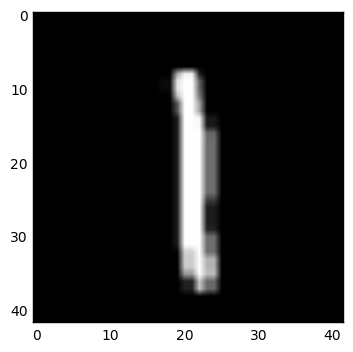

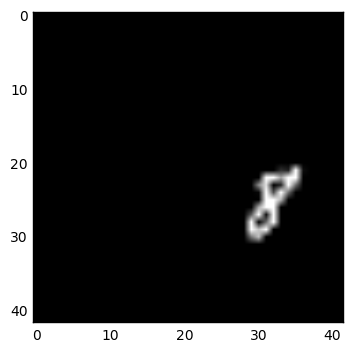

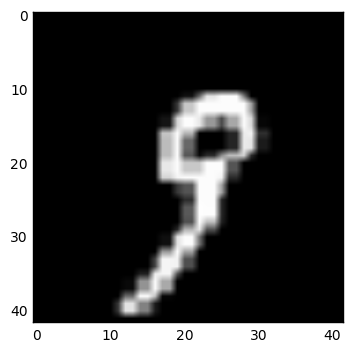

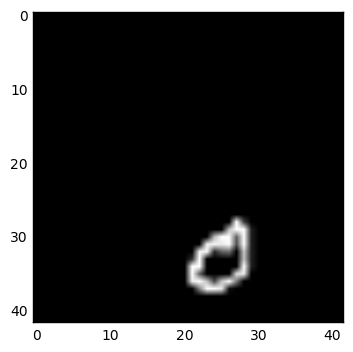

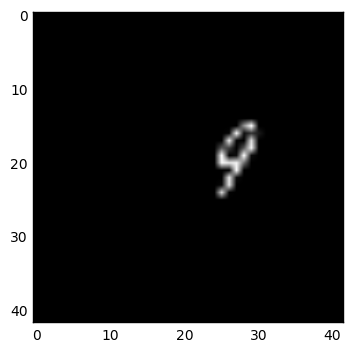

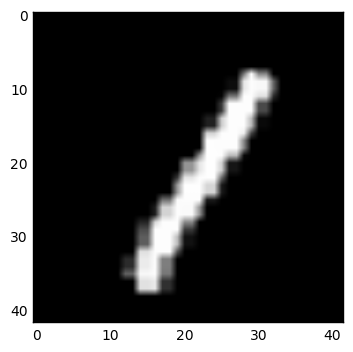

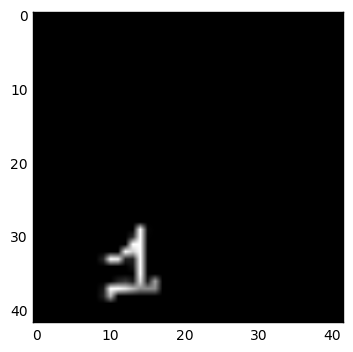

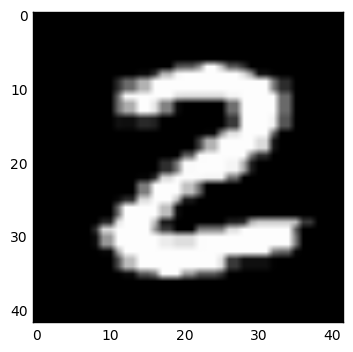

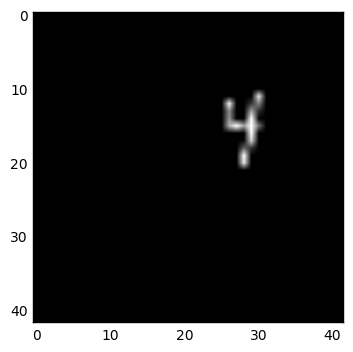

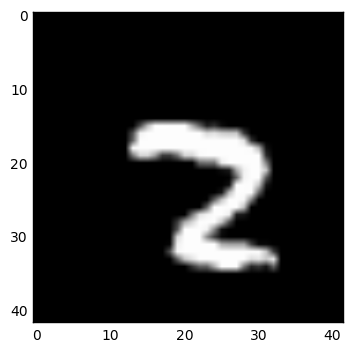

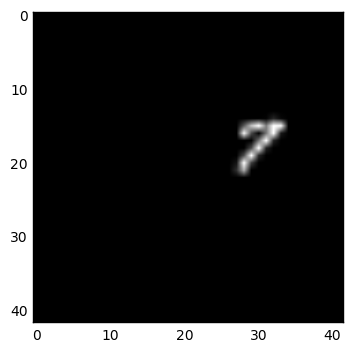

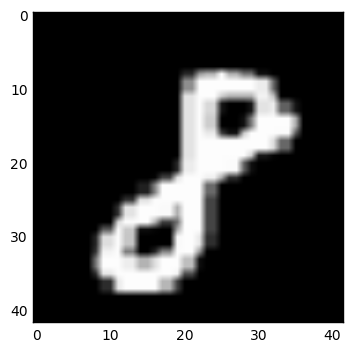

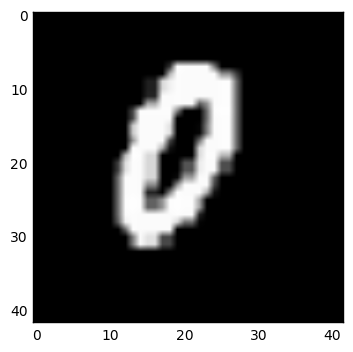

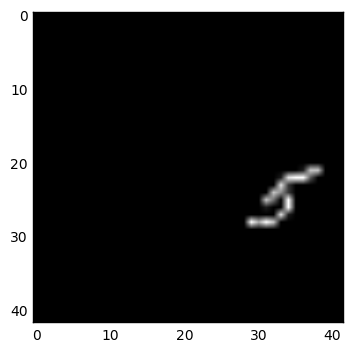

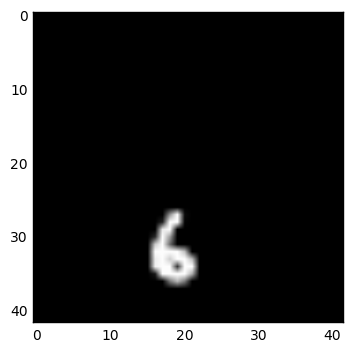

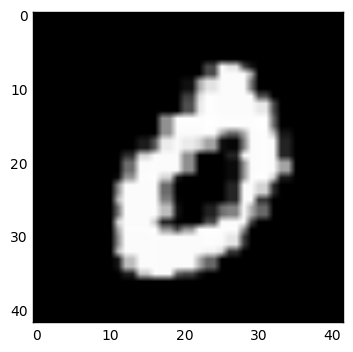

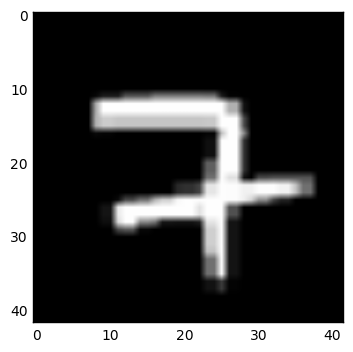

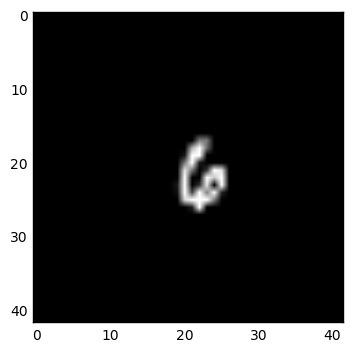

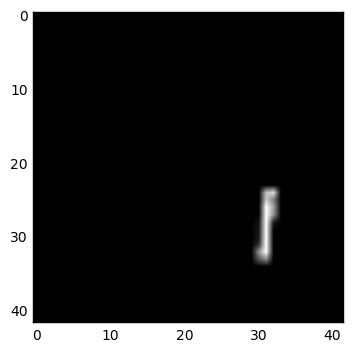

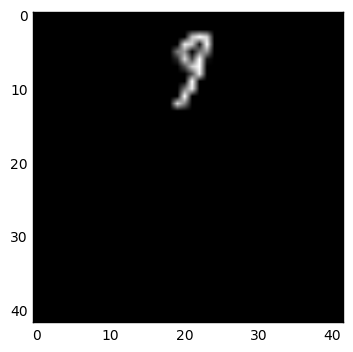

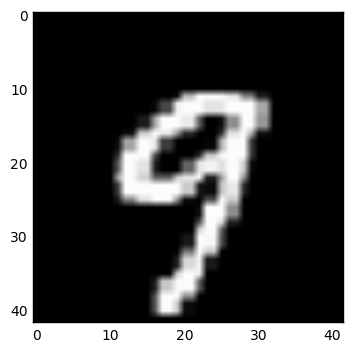

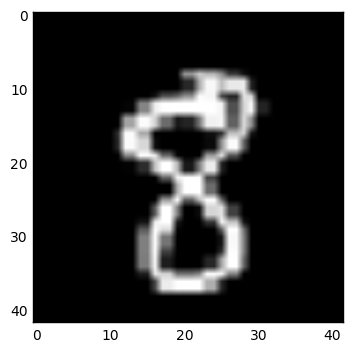

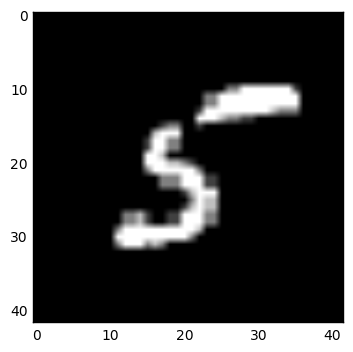

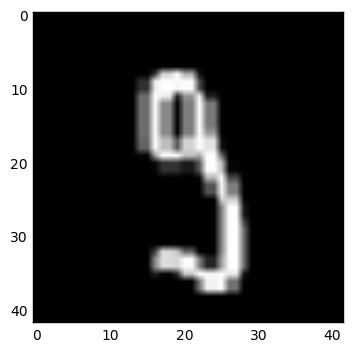

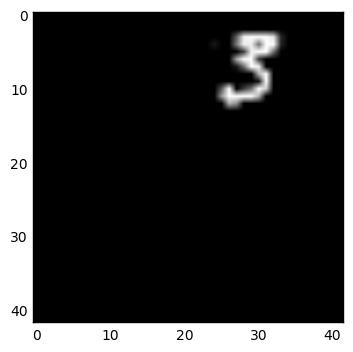

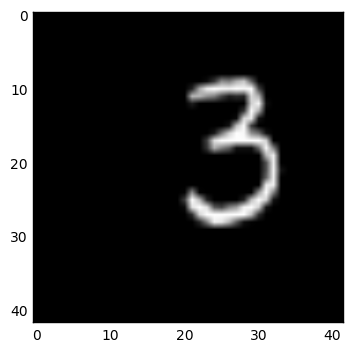

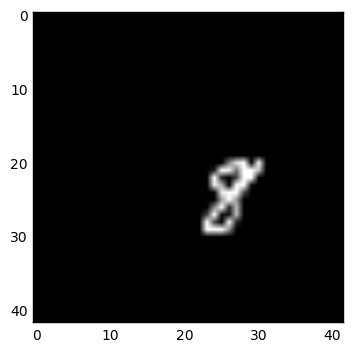

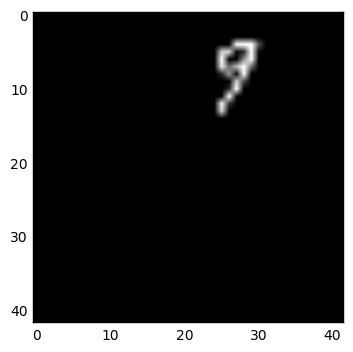

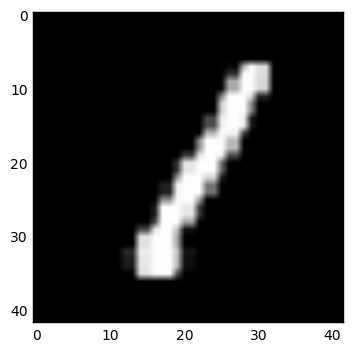

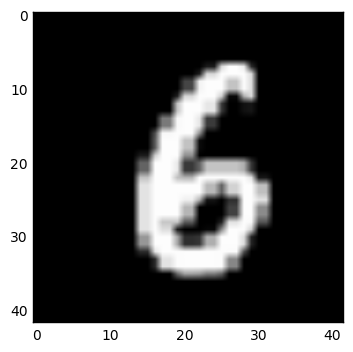

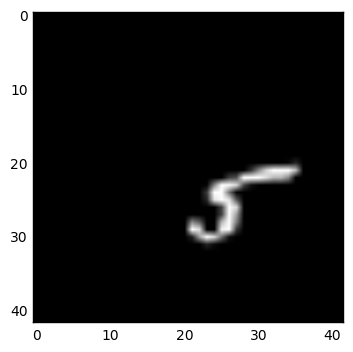

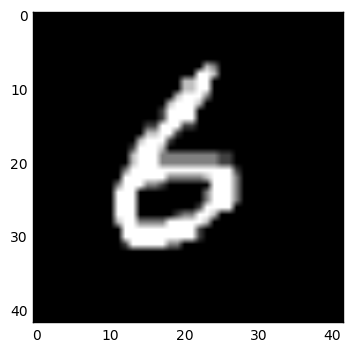

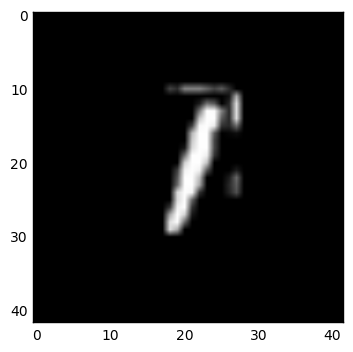

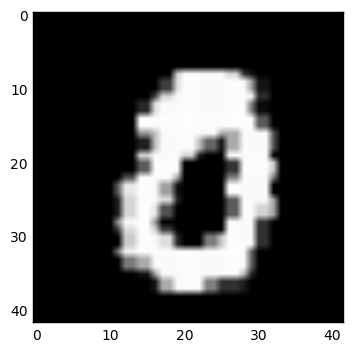

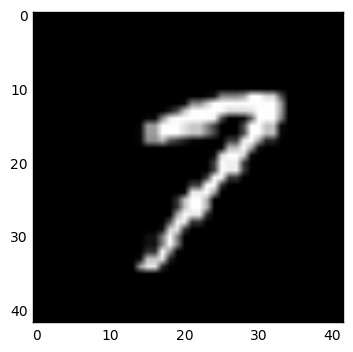

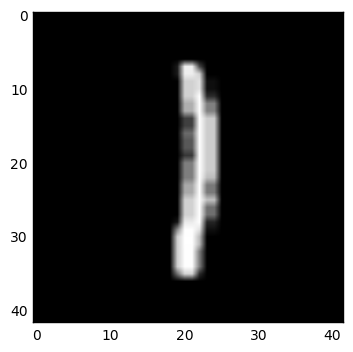

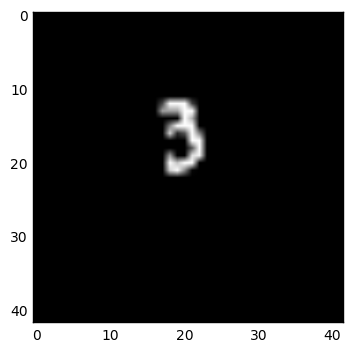

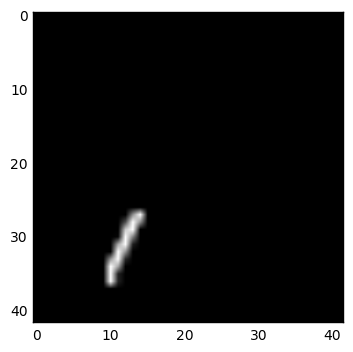

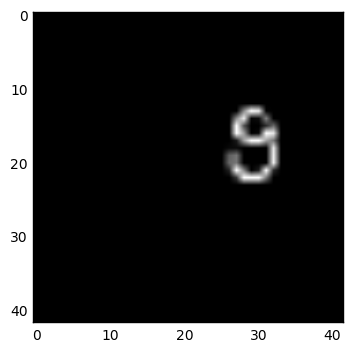

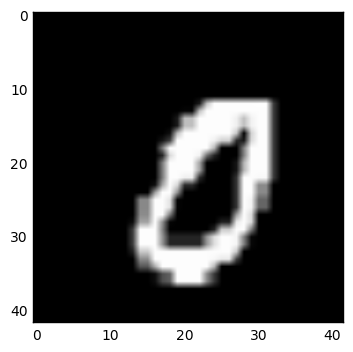

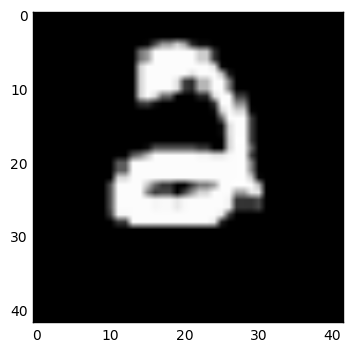

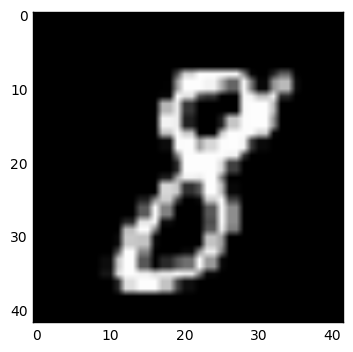

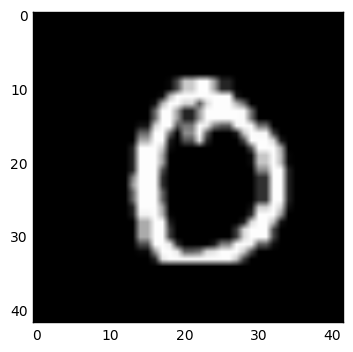

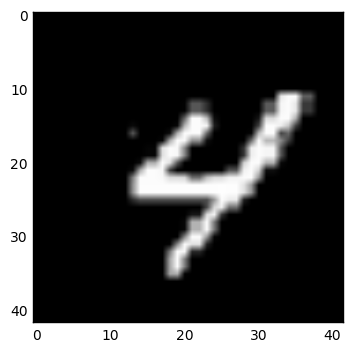

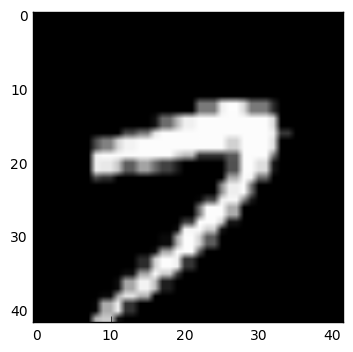

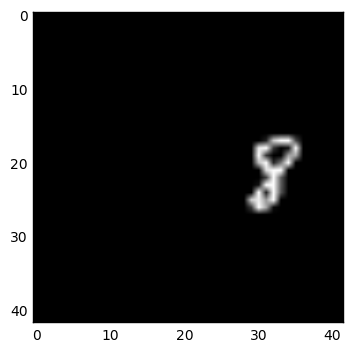

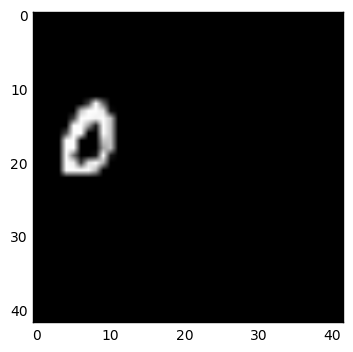

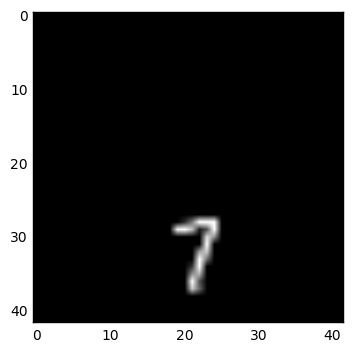

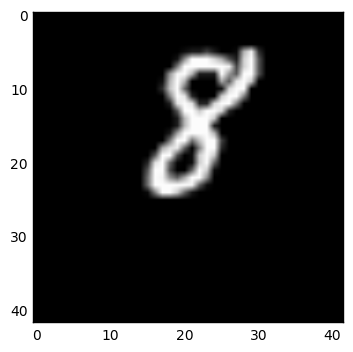

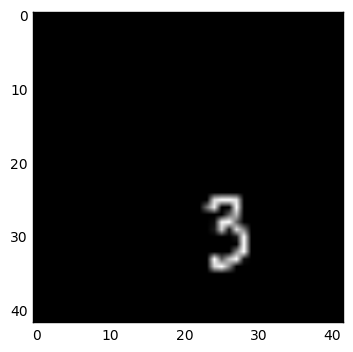

In [71]:
attentions = output_list[2]
for index, attention in enumerate(attentions):
    if 0.3 < attention[1] and attention[1] < 0.4:
        pl.figure()
        pl.imshow(training_X[index].reshape((42, 42)), cmap='gray')

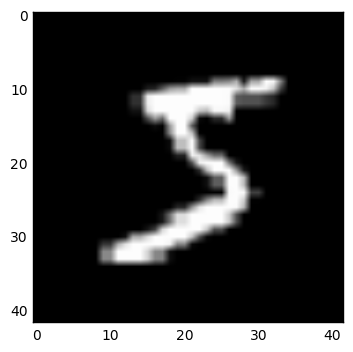

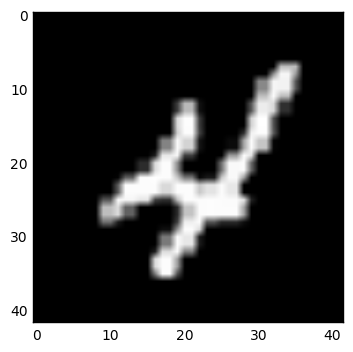

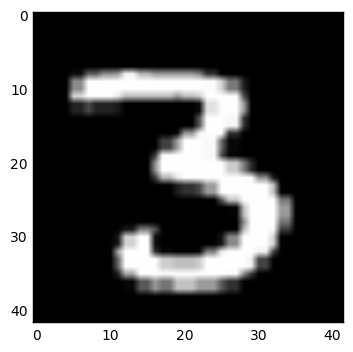

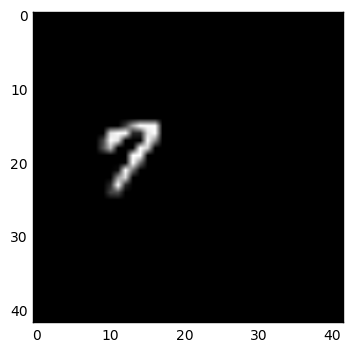

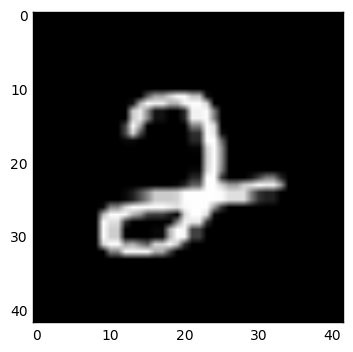

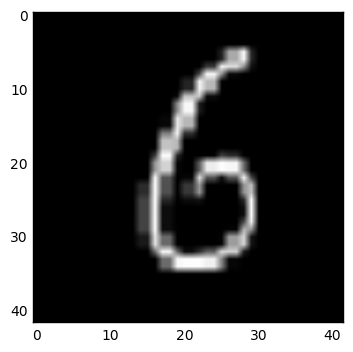

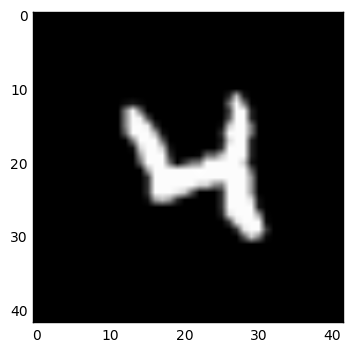

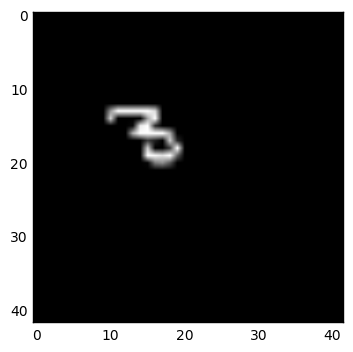

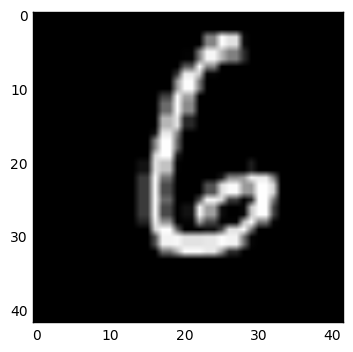

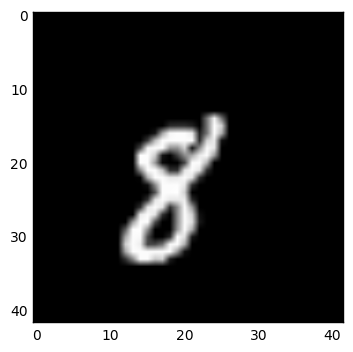

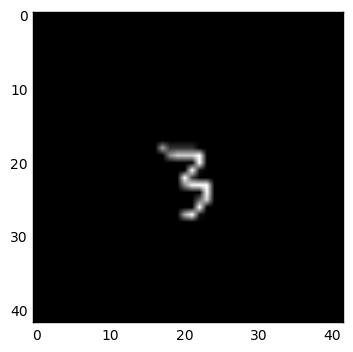

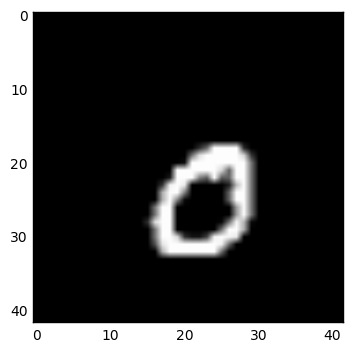

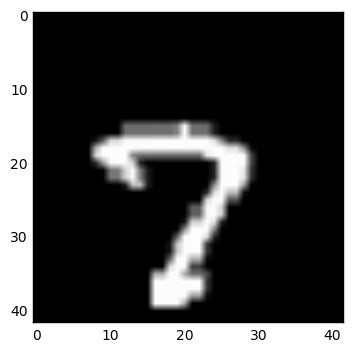

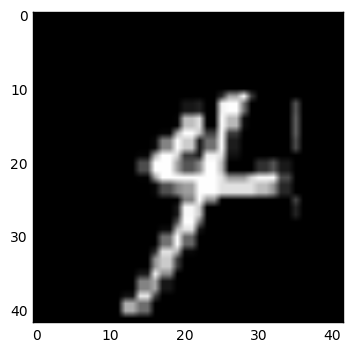

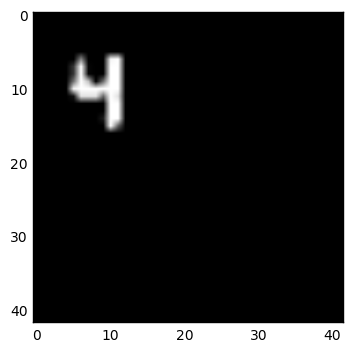

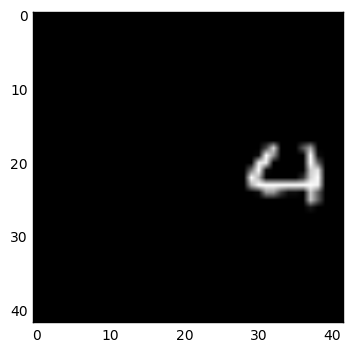

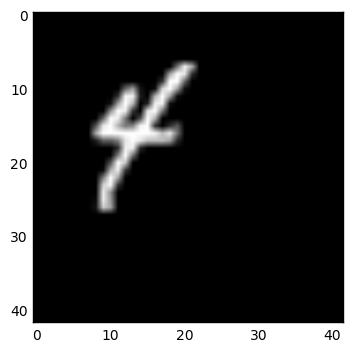

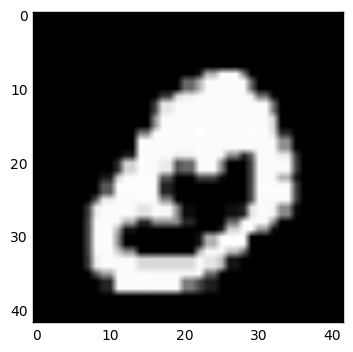

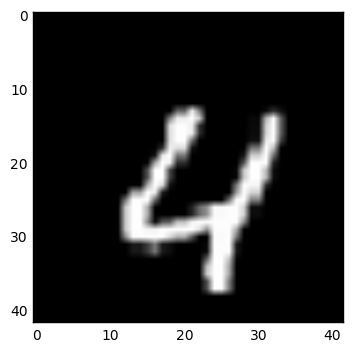

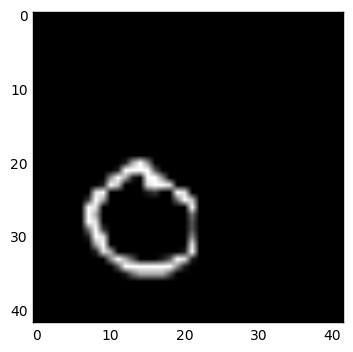

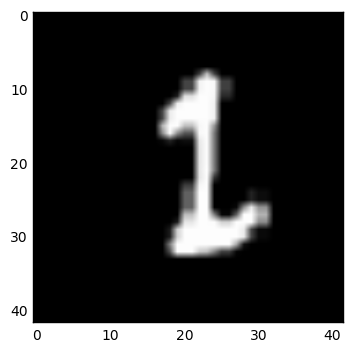

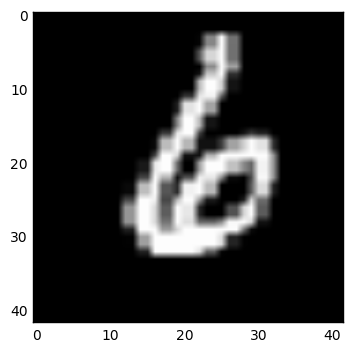

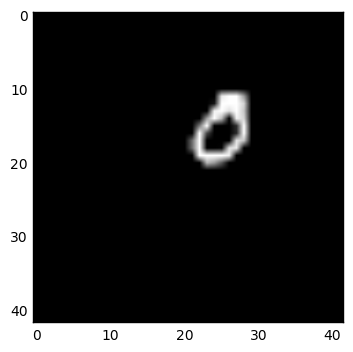

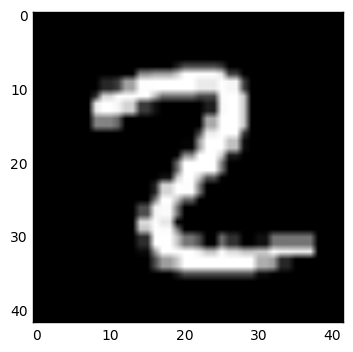

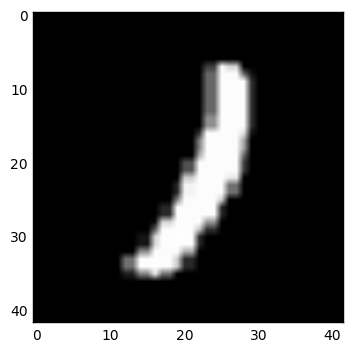

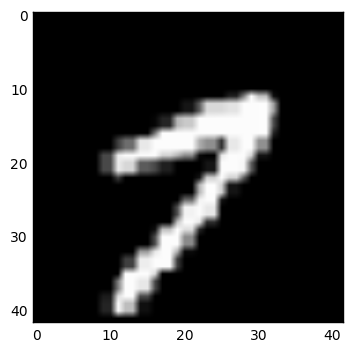

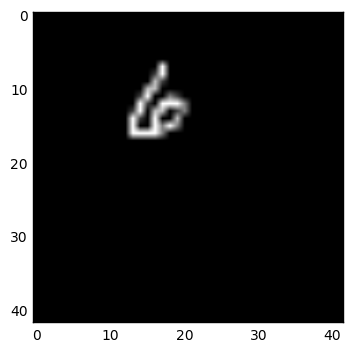

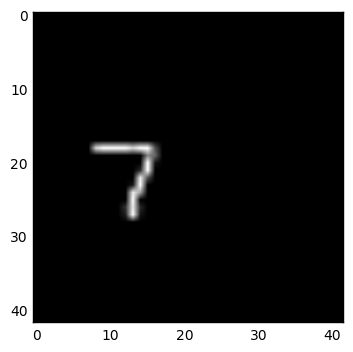

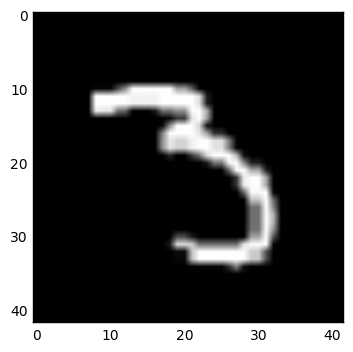

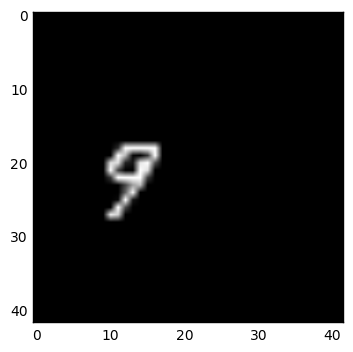

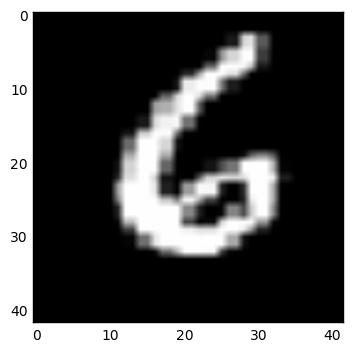

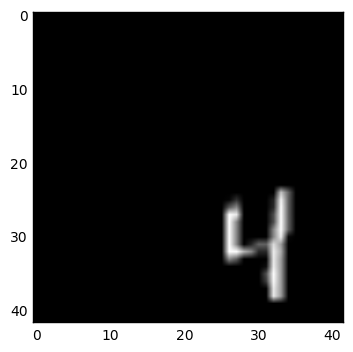

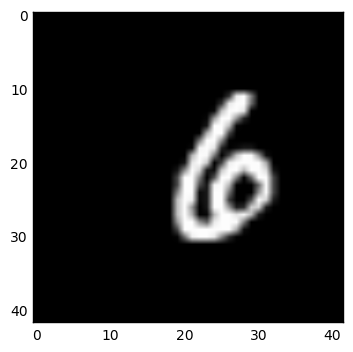

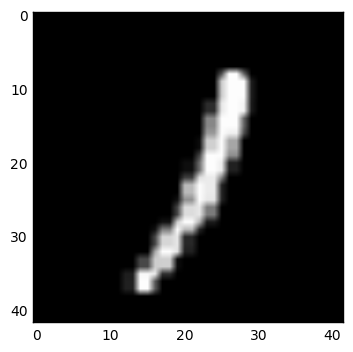

In [72]:
attentions = output_list[2]
for index, attention in enumerate(attentions):
    if 0.4 < attention[1] and attention[1] < 0.5:
        pl.figure()
        pl.imshow(training_X[index].reshape((42, 42)), cmap='gray')